In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df=pd.read_csv("D:\Machine Learning\projects\Brain stroke detection\healthcare-dataset-stroke-data.csv")

In [112]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [113]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [115]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [116]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [117]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [118]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [119]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [120]:
df['Residence_type']=df['Residence_type'].map({'Urban':0,'Rural':1})

In [121]:
df['ever_married']=df['ever_married'].map({'Yes':0,'No':1})

In [122]:
df['bmi'].max()

97.6

In [123]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type             object
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [124]:
df.drop('smoking_status',axis=1,inplace=True)

In [125]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,9046,Male,67.0,0,1,0,Private,0,228.69,36.6,1
1,51676,Female,61.0,0,0,0,Self-employed,1,202.21,NaN,1
2,31112,Male,80.0,0,1,0,Private,1,105.92,32.5,1
3,60182,Female,49.0,0,0,0,Private,0,171.23,34.4,1
4,1665,Female,79.0,1,0,0,Self-employed,1,174.12,24.0,1


In [126]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [127]:
df[df['gender']=='Other']



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
3116,56156,Other,26.0,0,0,1,Private,1,143.33,22.4,0


<Axes: xlabel='stroke', ylabel='count'>

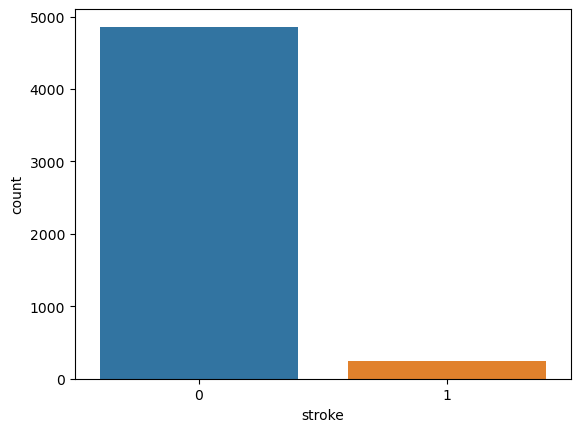

In [128]:
sns.countplot(data=df,x='stroke')

In [129]:
df=df.drop(index=3116,axis=0)

In [130]:
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

In [131]:
df['gender']=df['gender'].map({'Male':0,'Female':1})

In [132]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,9046,0,67.0,0,1,0,Private,0,228.69,36.6,1
1,51676,1,61.0,0,0,0,Self-employed,1,202.21,NaN,1
2,31112,0,80.0,0,1,0,Private,1,105.92,32.5,1
3,60182,1,49.0,0,0,0,Private,0,171.23,34.4,1
4,1665,1,79.0,1,0,0,Self-employed,1,174.12,24.0,1


In [133]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
stroke                 0
dtype: int64

In [134]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [135]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

In [136]:
df=df.drop('work_type',axis=1)

In [137]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64

In [138]:
X=df.drop('stroke',axis=1)

In [139]:
y=df['stroke']

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=101)

In [142]:
from sklearn.metrics import mean_absolute_error,accuracy_score

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
rf=RandomForestClassifier(max_depth=10)

In [145]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [146]:
preds=rf.predict(X_test)

In [147]:
from sklearn.metrics import classification_report,confusion_matrix,fbeta_score

In [148]:
classification_report_rf=classification_report(y_test,preds)
random_forest_acc=accuracy_score(y_test,preds)
print(classification_report_rf)
confusion_matrix(y_test,preds)



              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



array([[967,   1],
       [ 54,   0]], dtype=int64)

In [149]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [150]:
ada_model=AdaBoostClassifier(n_estimators=300)

In [151]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=300)

In [152]:
gr_model=GradientBoostingClassifier(n_estimators=150,)

In [153]:
gr_model.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=150)

In [154]:
ada_pred=ada_model.predict(X_test)

In [155]:
gr_pred=gr_model.predict(X_test)


In [156]:
print(classification_report(y_test,ada_pred))
adaboost_acc=accuracy_score(y_test,ada_pred)
adbst_confusion_matrix=confusion_matrix(y_test,ada_pred)
adbst_confusion_matrix



              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.33      0.02      0.04        54

    accuracy                           0.95      1022
   macro avg       0.64      0.51      0.50      1022
weighted avg       0.92      0.95      0.92      1022



array([[966,   2],
       [ 53,   1]], dtype=int64)

In [157]:
print(classification_report(y_test,gr_pred))
grboost_acc=accuracy_score(y_test,gr_pred)
gdbst_confusion_matrix=confusion_matrix(y_test,gr_pred)
gdbst_confusion_matrix




              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.94      0.92      1022



array([[964,   4],
       [ 54,   0]], dtype=int64)

In [158]:
fbeta_score(y_test, gr_pred, average='macro', beta=1)

0.48539778449144005

In [159]:
fbeta_score(y_test, ada_pred, average='macro', beta=0.5)

0.5166654651190733

In [160]:
from sklearn.preprocessing import StandardScaler

In [161]:
scaler=StandardScaler()

In [162]:
scaled_X_train=scaler.fit_transform(X_train)

In [163]:
scaled_X_test=scaler.transform(X_test)

In [164]:
from sklearn.neighbors import KNeighborsClassifier

In [165]:
knn_model=KNeighborsClassifier(n_neighbors=1)

In [166]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [167]:
y_pred=knn_model.predict(scaled_X_test)

In [168]:
confusion_matrix(y_test,y_pred)


array([[940,  28],
       [ 50,   4]], dtype=int64)

In [169]:
classification_report_knn=classification_report(y_test,y_pred)
knn_acc=accuracy_score(y_test,y_pred)
print(classification_report_knn)


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       968
           1       0.12      0.07      0.09        54

    accuracy                           0.92      1022
   macro avg       0.54      0.52      0.53      1022
weighted avg       0.91      0.92      0.91      1022



In [170]:
from sklearn.metrics import accuracy_score

In [171]:
accuracy_score(y_test,y_pred)

0.923679060665362

In [172]:
test_error_rates=[]
for k in range(1,30):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    y_pred_test=knn_model.predict(scaled_X_test)
    test_error=1-accuracy_score(y_test,y_pred)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K NEIGHBOUR')

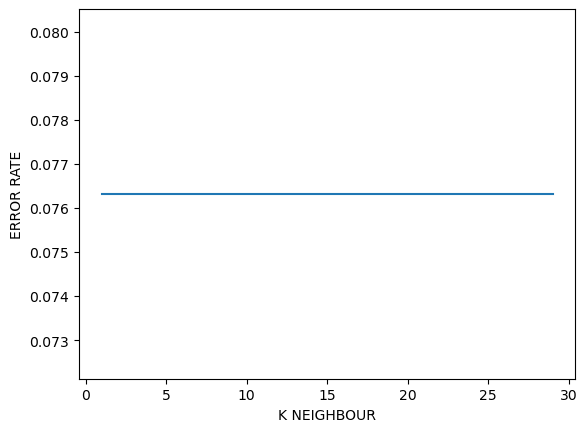

In [173]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K NEIGHBOUR')


In [174]:
scaler=StandardScaler()

In [175]:
knn=KNeighborsClassifier()

In [176]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [177]:
operations=[('scaler',scaler),('knn',knn)]

In [178]:
from sklearn.pipeline import Pipeline

In [179]:
pipe=Pipeline(operations)

In [180]:
from sklearn.model_selection import GridSearchCV

In [181]:
k_values=list(range(1,20))

In [182]:
param_grid={'knn__n_neighbors':k_values,}

In [183]:
full_cv_classifier=GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [184]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [185]:
full_pred=full_cv_classifier.predict(X_test)

In [186]:
print(classification_report(y_test,full_pred))
fullCV_acc=accuracy_score(y_test,full_pred)
confusion_matrix_KNclassifier=confusion_matrix(y_test,full_pred)
confusion_matrix_KNclassifier


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[968,   0],
       [ 54,   0]], dtype=int64)

In [187]:
 from sklearn.metrics import precision_score, f1_score

try:
    precision = precision_score(y_test, full_pred)
    f1 = f1_score(y_test, full_pred)
except UndefinedMetricWarning as e:
    precision = 0.0
    f1 = 0.0
    # You can choose to 'warn', 'raise', or 'ignore' the warning based on your preference.
    # For example, to ignore the warning:
    # warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

print(f"Precision: {precision}, F1-score: {f1}")


Precision: 0.0, F1-score: 0.0


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [188]:
f1_score(y_test, full_pred, average='weighted')

0.9214605316209226

In [189]:
print(classification_report(y_test,full_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: xlabel='age', ylabel='bmi'>

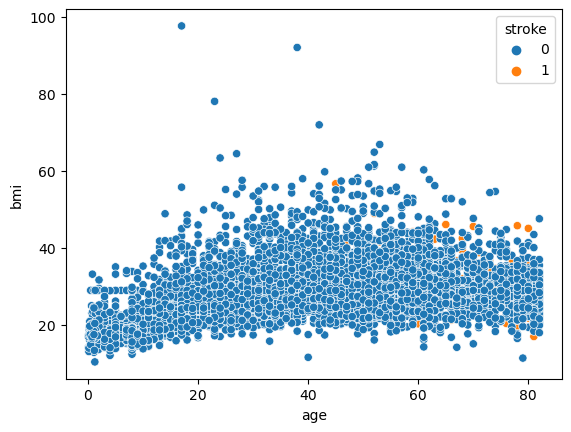

In [190]:
sns.scatterplot(x='age',y='bmi',hue='stroke',data=df)

In [191]:
from sklearn.svm import SVC

svm_model.fit(X_train,y_train)

In [192]:
svc=SVC(class_weight='balanced')

In [193]:
from sklearn.model_selection import GridSearchCV

In [194]:
param_grid={'C':[0.1,0.5,1]}

In [195]:
grid=GridSearchCV(svc,param_grid)

In [196]:
grid.fit(scaled_X_train,y_train)


GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 0.5, 1]})

In [197]:
grid_preds=grid.predict(scaled_X_test)
grid_preds

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [198]:
confusion_matrix(y_test,grid_preds)

array([[763, 205],
       [ 20,  34]], dtype=int64)

In [199]:
classification_report(y_test,grid_preds)
svm_acc=accuracy_score(y_test,grid_preds)

In [200]:
accuracy_score(y_test,grid_preds)

0.7798434442270059

In [201]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [202]:
mean_absolute_error(y_test,elas_pred)

0.09610649006441854

In [203]:
myindex=['random_forest_accuracy','svm_accuracy','adaboost_accuracy','grboost_accuracy','knn_accuracy','fullCV_accuracy']

In [204]:
mydata=[random_forest_acc,svm_acc,adaboost_acc,grboost_acc,knn_acc,fullCV_acc]

In [205]:
myser=pd.Series(data=mydata,index=myindex)

In [206]:
myser

random_forest_accuracy    0.946184
svm_accuracy              0.779843
adaboost_accuracy         0.946184
grboost_accuracy          0.943249
knn_accuracy              0.923679
fullCV_accuracy           0.947162
dtype: float64

In [207]:
adaboost_acc

0.9461839530332681

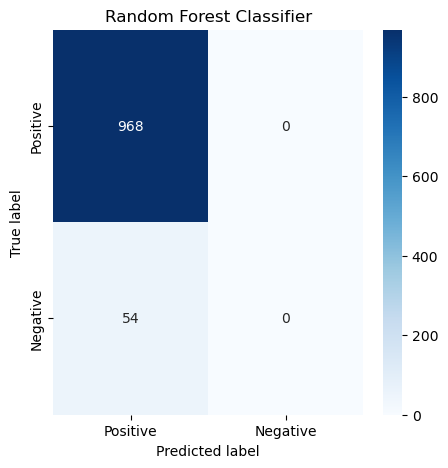

In [208]:
plt.figure(figsize=(5,5),dpi=100)
confusion_matrix_KNclassifier =confusion_matrix(y_test,full_pred)
sns.heatmap(confusion_matrix_KNclassifier,annot=True,xticklabels=['Positive','Negative'], yticklabels=[ 'Positive','Negative'],
           cmap='Blues',fmt='d')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title("Random Forest Classifier")
plt.show()

In [ ]:
""" The dataset is extremely unbalanced and will not give the accurate information
this can be overcome by two methods:
1.Upscale the Minority Class
2.Downscale the Majority class """

In [245]:
# UPSCALING THE MINORITY CLASS
n=df.stroke.value_counts()[0]

In [224]:
from sklearn.utils import resample
df_majority = df[df.stroke==0]
df_minority = df[df.stroke==1]

df_minority_upsampled = resample(df_minority,replace=True,n_samples = n,random_state=101)

df_upsampled = pd.concat([df_majority,df_minority_upsampled])
df_upsampled.stroke.value_counts()

0    4860
1    4860
Name: stroke, dtype: int64

In [225]:
X = df_upsampled.drop('stroke',axis=1)
y = df_upsampled[['stroke']]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7290, 9), (2430, 9), (7290, 1), (2430, 1))

In [246]:
from sklearn.ensemble import RandomForestClassifier
rf_upscale=RandomForestClassifier(max_depth=10)

In [247]:
rf.fit(X_train,y_train)
rf_upscale_preds=rf.predict(X_test)

print(classification_report(y_test,rf_upscale_preds))
rf_conmat=confusion_matrix(y_test,rf_upscale_preds)
rf_conmat

C:\Users\hp\AppData\Local\Temp\ipykernel_6816\3125865776.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


              precision    recall  f1-score   support

           0       1.00      0.88      0.94      1215
           1       0.89      1.00      0.94      1215

    accuracy                           0.94      2430
   macro avg       0.95      0.94      0.94      2430
weighted avg       0.95      0.94      0.94      2430



array([[1072,  143],
       [   0, 1215]], dtype=int64)

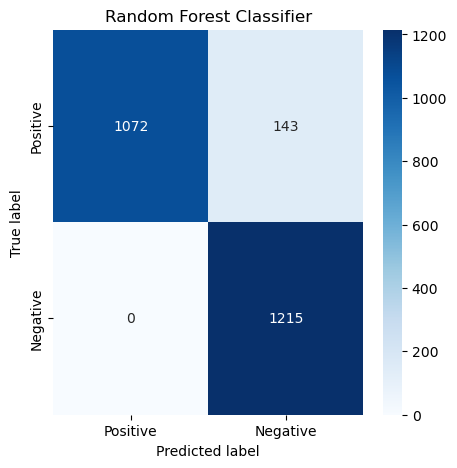

In [248]:
plt.figure(figsize=(5,5),dpi=100)

sns.heatmap(rf_conmat,annot=True,xticklabels=['Positive','Negative'], yticklabels=[ 'Positive','Negative'],
           cmap='Blues',fmt='d')

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title("Random Forest Classifier")
plt.show()

In [241]:
upscale_ada_model=AdaBoostClassifier(n_estimators=300)
upscale_ada_model.fit(X_train,y_train)
upscale_ada_pred=ada_model.predict(X_test)
print(classification_report(y_test,upscale_ada_pred))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1215
           1       0.82      0.92      0.87      1215

    accuracy                           0.86      2430
   macro avg       0.86      0.86      0.86      2430
weighted avg       0.86      0.86      0.86      2430



In [244]:

upscale_gr_model=GradientBoostingClassifier(n_estimators=300)
upscale_gr_model.fit(X_train,y_train)
upscale_gr_pred=ada_model.predict(X_test)
print(classification_report(y_test,upscale_gr_pred))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.91      0.79      0.85      1215
           1       0.82      0.92      0.87      1215

    accuracy                           0.86      2430
   macro avg       0.86      0.86      0.86      2430
weighted avg       0.86      0.86      0.86      2430



In [249]:
final_model=RandomForestClassifier(max_depth=10)

In [250]:
final_model.fit(X,y)

C:\Users\hp\AppData\Local\Temp\ipykernel_6816\3155372493.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  final_model.fit(X,y)


RandomForestClassifier(max_depth=10)

In [262]:
import joblib

In [263]:
joblib.dump(final_model,'brainstroke_model.pkl')

['brainstroke_model.pkl']

In [264]:
joblib.dump(list(X.columns),'BS_col_names.pkl')

['BS_col_names.pkl']

In [265]:
#load columns
BS_new_columns=joblib.load('BS_col_names.pkl')

In [266]:
BS_new_columns

['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'Residence_type',
 'avg_glucose_level',
 'bmi']

In [267]:
loaded_BS_model=joblib.load('brainstroke_model.pkl')

In [268]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,9046,0,67.0,0,1,0,0,228.69,36.60000,1
1,51676,1,61.0,0,0,0,1,202.21,28.89456,1
2,31112,0,80.0,0,1,0,1,105.92,32.50000,1
3,60182,1,49.0,0,0,0,0,171.23,34.40000,1
4,1665,1,79.0,1,0,0,1,174.12,24.00000,1


In [270]:
loaded_BS_model.predict([[1665,1,79.0,1,0,0,1,174.12,24.00]])

C:\Users\hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [261]:
y_train.value_counts()

stroke
0         3645
1         3645
dtype: int64